In [92]:
# This is data analysis of the salaries in the field of data science. 
# I used Data Science Job Salaries dataset that is publicly available on Kaggle:
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [93]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
# Read data

df = pd.read_csv('salaries.csv')
print(df.head())

   work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   
2       2022               MI              FT             Data Scientist   
3       2022               MI              FT             Data Scientist   
4       2022               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   
2  120000             USD         120000                 US           100   
3  100000             USD         100000                 US           100   
4   85000             USD          85000                 US           100   

  company_location company_size  
0               US            M  
1           

In [95]:
# INSPECT, CLEAN, AND TRANSFORM DATA

# Check data size

print('Total rows: ', df.shape[0])
print('Total columns: ', df.shape[1])

Total rows:  1332
Total columns:  11


In [96]:
# Chack data types and columns

print(df.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [97]:
# Check if there are missing rows

c=df.isnull().sum()
print(c)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [98]:
# Drop unnecessary columns

df = df.drop(['salary', 'salary_currency', 'remote_ratio'], axis=1)

print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'company_location',
       'company_size'],
      dtype='object')


In [99]:
print(df['employment_type'].unique())

['FT' 'PT' 'CT' 'FL']


In [100]:
# Keep only FT (full-time) jobs, and drop 'employment_type' column

df = df[~df.employment_type.isin(['PT', 'CT', 'FL'])]
df = df.drop(['employment_type'], axis=1)



AxesSubplot(0.125,0.125;0.775x0.755)


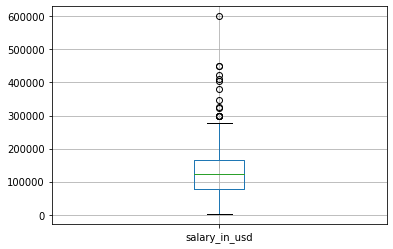

In [101]:
# Check if there are outliers

print(df.boxplot(column=['salary_in_usd']))

In [102]:
# Get outlier data

df[df['salary_in_usd'] > 500000]


,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size
1278,2021,EX,Principal Data Engineer,600000,US,US,L


In [103]:
# Drop the outlier

df = df.drop(index=(1278))

AxesSubplot(0.125,0.125;0.775x0.755)


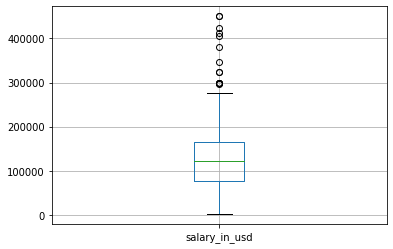

In [104]:
print(df.boxplot(column=['salary_in_usd']))

In [105]:
print(df[df['salary_in_usd'] < 10000].count())
print(df[df['salary_in_usd'] > 250000].count())


work_year             23
experience_level      23
job_title             23
salary_in_usd         23
employee_residence    23
company_location      23
company_size          23
dtype: int64
work_year             23
experience_level      23
job_title             23
salary_in_usd         23
employee_residence    23
company_location      23
company_size          23
dtype: int64


In [106]:
# Drop the outliers on both sides

df = df.drop(df[df.salary_in_usd < 10000].index)
df = df.drop(df[df.salary_in_usd > 250000].index)


In [107]:
# Check the job titles

print(df['job_title'].unique())

['Machine Learning Engineer' 'Data Scientist' 'Data Engineer'
 'Head of Data' 'Data Analyst' 'BI Analyst' 'Analytics Engineer'
 'Research Engineer' 'Data Operations Analyst' 'ML Engineer'
 'Data Architect' 'Data Operations Engineer' 'Marketing Data Analyst'
 'Data Science Lead' 'Data Science Consultant' 'Data Manager'
 'BI Data Analyst' 'Big Data Engineer' 'Principal Data Architect'
 'Machine Learning Manager' 'Applied Scientist' 'Lead Data Scientist'
 'Lead Machine Learning Engineer' 'Research Scientist'
 'Data Analytics Engineer' 'ETL Developer' 'AI Scientist'
 'Data Scientist Lead' 'Data Science Manager' 'Data Specialist'
 'Business Data Analyst' 'Applied Machine Learning Scientist'
 'Machine Learning Research Engineer' 'Machine Learning Scientist'
 'Machine Learning Developer' 'Data Engineering Manager'
 'Director of Data Science' 'Financial Data Analyst'
 'Data Analytics Consultant' 'Product Data Analyst'
 'Machine Learning Infrastructure Engineer' 'Applied Data Scientist'
 'Cloud

In [108]:
# Define a function to extract relevant keywords from job titles and aply to column role

def extract_keywords(title):
    titles = ['principal', 'director', 'head', 'manager', 'lead',
              'engineer', 'scientist', 'analyst', 'architect', 
              'developer', 'consultant', 'specialist']

    for title_keyword in titles:
        if title_keyword in title.lower():
            return title_keyword
    return 'other'

df['role'] = df['job_title'].apply(extract_keywords)
df.groupby("role").size()

role
analyst       213
architect      37
consultant      9
developer      15
director        9
engineer      491
head           12
lead           19
manager        48
principal      11
scientist     389
specialist      6
dtype: int64

In [109]:
# Check role - other

print(df[df['role']== "other"])

Empty DataFrame
Columns: [work_year, experience_level, job_title, salary_in_usd, employee_residence, company_location, company_size, role]
Index: []


In [110]:
# Calculate average salaries by job role 

avg_salary = df.groupby(['role'])['salary_in_usd'].mean()
avg_salary.sort_values(ascending=False, inplace=True)

print(avg_salary)

role
principal     159302.818182
architect     158690.702703
director      156486.444444
manager       154834.500000
head          152355.583333
specialist    134166.666667
scientist     125390.912596
engineer      124219.576375
developer     117634.666667
lead          106796.842105
analyst        97733.272300
consultant     94915.333333
Name: salary_in_usd, dtype: float64


In [111]:
# Correlation matrix with using factorize to assign a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,role
work_year,1.000000,0.077649,0.228291,0.463504,0.361548,0.341213,0.485826,0.101955
experience_level,0.077649,1.000000,0.048213,-0.015416,0.016771,0.022350,0.137793,0.045694
job_title,0.228291,0.048213,1.000000,0.166797,0.125423,0.113566,0.204024,0.564331
salary_in_usd,0.463504,-0.015416,0.166797,1.000000,0.356781,0.354952,0.256262,0.098384
employee_residence,0.361548,0.016771,0.125423,0.356781,1.000000,0.826924,0.367817,-0.001494
company_location,0.341213,0.022350,0.113566,0.354952,0.826924,1.000000,0.317072,0.008930
company_size,0.485826,0.137793,0.204024,0.256262,0.367817,0.317072,1.000000,0.086053
role,0.101955,0.045694,0.564331,0.098384,-0.001494,0.008930,0.086053,1.000000


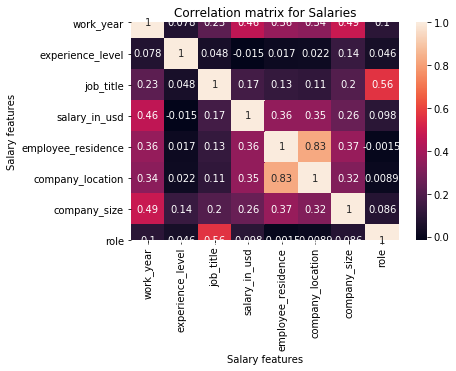

In [112]:
# Plot correlation matrix

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Salaries")
plt.xlabel("Salary features")
plt.ylabel("Salary features")
plt.show()

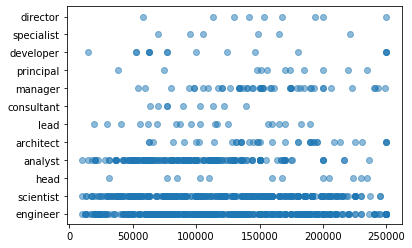

In [113]:
# Plot salary_in_usd and role

plt.scatter(x=df['salary_in_usd'], y=df['role'], alpha=0.5)
plt.show()

In [114]:
# Count company locations

grouped_location = df.groupby(['company_location'])
location_count = grouped_location['company_location'].count()
location_count.sort_values(ascending=False, inplace=True)

print(location_count.head(20))

company_location
US    902
GB     87
CA     39
DE     33
ES     27
IN     25
FR     19
GR     13
BR     11
AU      9
PT      9
NL      8
JP      5
AT      5
TR      5
PL      4
BE      4
PR      4
LU      3
AE      3
Name: company_location, dtype: int64


In [115]:
# Drop rows where countries count is less than 10 

location_count = location_count.loc[location_count >= 10]
countries = list(location_count.index)
df = df[df.company_location.isin(countries)]
print(df['company_location'].unique())

['US' 'ES' 'GB' 'FR' 'CA' 'BR' 'IN' 'DE' 'GR']


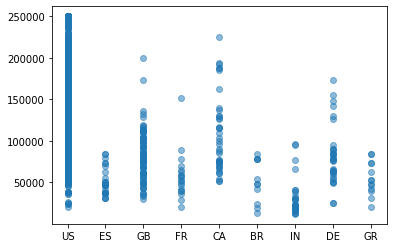

In [116]:
plt.scatter(x=df['company_location'], y=df['salary_in_usd'], alpha=0.5)
plt.show()

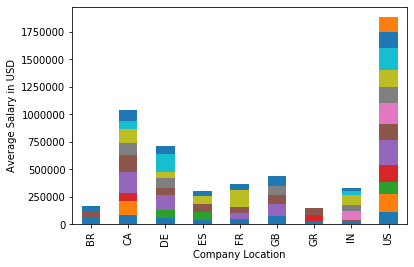

In [128]:
# Plot average salaries for every role by country

grouped = df.groupby(['company_location', 'role']).mean().reset_index()

pivot_table = grouped.pivot(index='company_location', columns='role', values='salary_in_usd')

pivot_table.plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.show()

In [131]:
# Replace NaN in pivot table

pivot_table = pivot_table.fillna(0)
print(pivot_table)

role                    analyst      architect  consultant      developer  \
company_location                                                            
BR                 63000.000000       0.000000         0.0       0.000000   
CA                 80302.900000  127601.000000         0.0   77382.000000   
DE                 57184.000000       0.000000     72499.0       0.000000   
ES                 41982.625000       0.000000     69741.0       0.000000   
FR                 44762.666667       0.000000         0.0       0.000000   
GB                 72668.222222       0.000000         0.0       0.000000   
GR                 31233.333333       0.000000         0.0   52643.000000   
IN                 17959.000000       0.000000         0.0       0.000000   
US                110348.192547  161433.911765    113400.0  154385.555556   

role              director       engineer           head           lead  \
company_location                                                          
BR

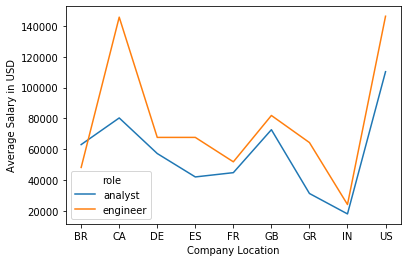

In [135]:
# Plot avg salaries for roles that are present in observed countries

pivot_table = pivot_table.loc[:, (pivot_table != 0).all()]
pivot_table.plot(kind='line', stacked=False)
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.show()
